In [38]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pandas as pd
from pathlib import Path

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import data_loader
import plotter
import plot_utils
import utils
import generate_params as genp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [40]:
data_mode = 'muchisimocks'
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n100000'
#tag_biasparams = '_biaszen_p4_n100000'
#n_train = 500
#n_train_arr = [500, 1000, 2000]
n_train_arr = [500, 1000, 2000, 4000, 6000, 8000, 10000]

#statistics = ['pk']
#statistics = ['bispec']
statistics = ['pk', 'bispec']
tag_stats = f'_{"_".join(statistics)}'

#tag_stats_arr = [f'_{"_".join(statistics)}' for statistics in statistics_arr]

# muchisimocks_pk_p5_n10000_biaszen_p4_n10000_ntrain10000
tags_inf = [
             f'_{data_mode}{tag_stats}{tag_params}{tag_biasparams}_ntrain{n_train}' for n_train in n_train_arr
            ]
inf_methods = ['sbi']*len(tags_inf)

In [41]:
for i, tag_inf in enumerate(tags_inf):
    dir_sbi = f'../results/results_sbi/sbi{tag_inf}'
    fn_posterior = f'{dir_sbi}/posterior.p'
    if not Path.exists(Path(fn_posterior)):
        print(f"fn_posterior {fn_posterior} not found!")

In [42]:
def green_shades(N):
    return [plt.cm.Greens(0.4 + 0.6 * i / (N - 1)) for i in range(N)]

colors = green_shades(len(n_train_arr))

labels = [
        f'n_train={n_train}' for n_train in n_train_arr
        ]

In [43]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary = [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]

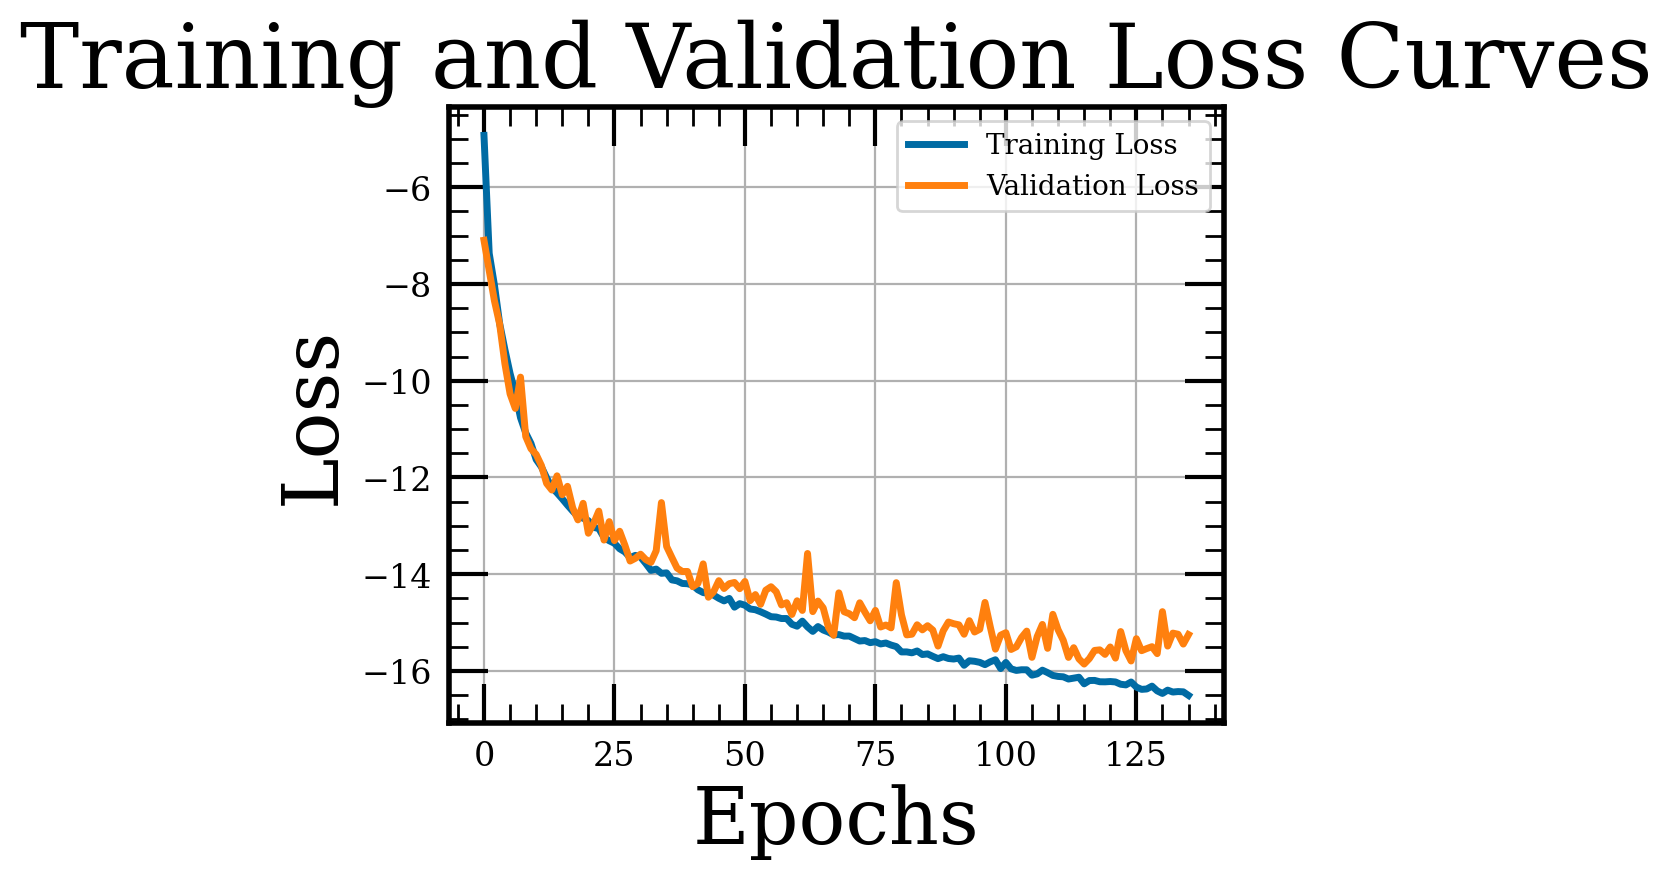

In [44]:
import pickle
dir_sbi = f'../results/results_sbi/sbi{tags_inf[2]}'

fn_inference = f'{dir_sbi}/inference.p'
with open(fn_inference, "rb") as f:
    inference = pickle.load(f)
# Extract training and validation loss
training_loss = inference._summary["training_loss"]
validation_loss = inference._summary["validation_loss"]

# Plot the loss curves
plt.figure(figsize=(5, 4))
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend(fontsize=10)
#plt.ylim(-10.5, -10)
plt.grid(True)

In [45]:
# load fixed-cosmo test set
tag_params_test_fixed = '_quijote_p0_n1000'
tag_biasparams_test_fixed = '_b1000_p0_n1'
tag_datagen_test_fixed = ''
theta_test_fixed = data_loader.load_theta_test(tag_params_test_fixed, tag_biasparams_test_fixed, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary)
print(theta_test_fixed.shape)

# get bounds
_, dict_bounds_cosmo, _ = genp.define_LH_cosmo(tag_params)
_, dict_bounds_bias, _ = genp.define_LH_bias(tag_biasparams)
extents = {**dict_bounds_cosmo, **dict_bounds_bias}

(9,)


In [46]:
tags_test = ['_'+data_mode + tag_stats + tag_params_test_fixed + tag_biasparams_test_fixed + tag_datagen_test_fixed + '_mean']*len(tags_inf)

for i, tag_inf in enumerate(tags_inf):
    dir_sbi = f'../results/results_sbi/sbi{tag_inf}'
    tag_test = tags_test[i]
    fn_samples_test_pred = f'{dir_sbi}/samples_test{tag_test}_pred.npy'
    if not Path.exists(Path(fn_samples_test_pred)):
        print(f"fn_samples {fn_samples_test_pred} not found!")

[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.    ]
['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl']
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain500/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain1000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain2000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain4000/samples_test_muchisimocks_pk_bispec_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
fn_samples = ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain6000/samples_test_muchi

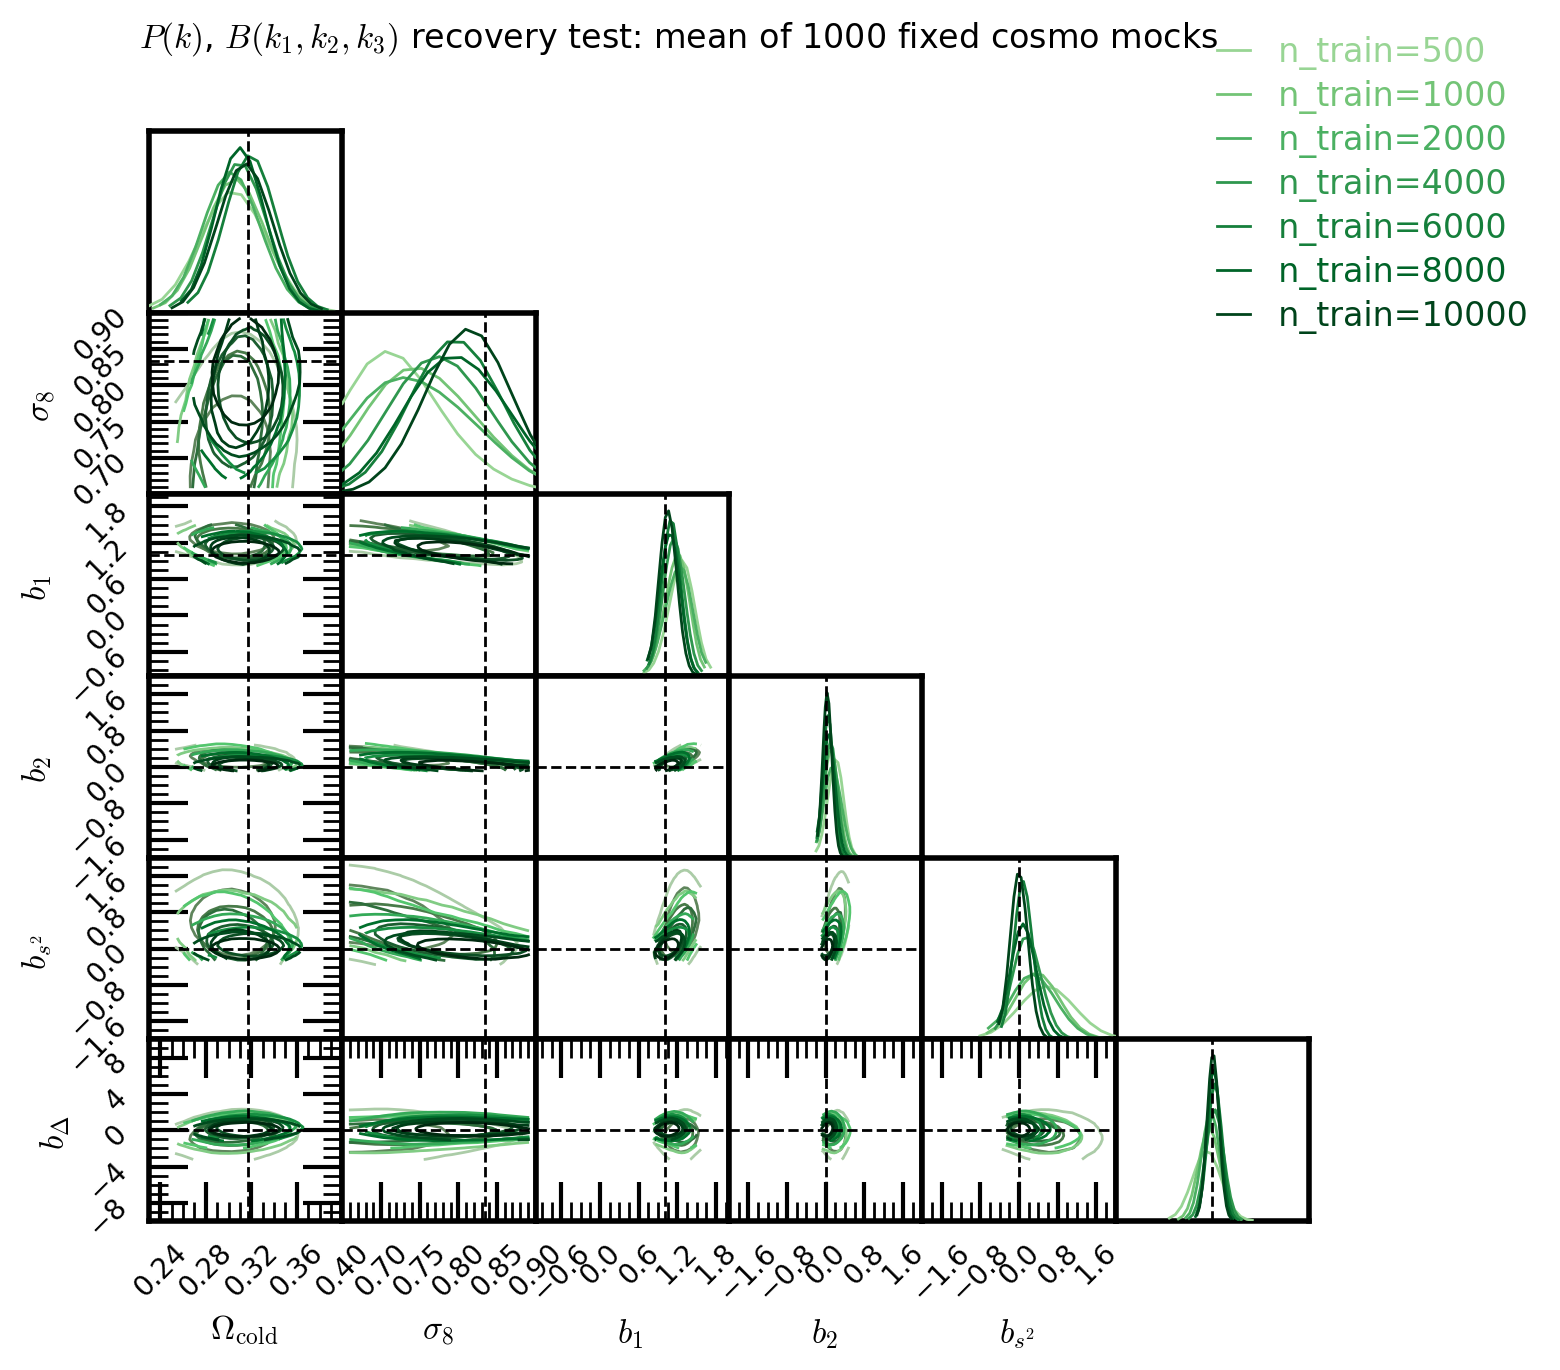

In [47]:
print(theta_test_fixed)
print(param_names_vary)
idx_obs = 0
title = f'{utils.get_stat_label(statistics)} recovery test: mean of 1000 fixed cosmo mocks'
#tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
# doing utils.biasparam_names_ordered here instead of bias_param_names_vary in case some param sets don't vary all the bias params but we want to show them on the same plot
param_names_contour = ['omega_cold', 'sigma8_cold'] + utils.biasparam_names_ordered
theta_test_fixed_show = theta_test_fixed[[i for i, name in enumerate(param_names_vary) if name in param_names_contour]]
plotter.plot_contours_inf(param_names_contour, idx_obs, theta_test_fixed_show, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels=labels,
                        title=title, extents=extents)

Get covariances for fixed-cosmo (CV) test

In [48]:
theta_test_pred_fixed_arr, covs_test_pred_fixed_arr = [], []
for i, tag_inf in enumerate(tags_inf):
    theta_test_pred_fixed, covs_test_pred_fixed, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_test[i])
    theta_test_pred_fixed_arr.append(theta_test_pred_fixed[0])
    covs_test_pred_fixed_arr.append(covs_test_pred_fixed[0])
    
theta_test_pred_fixed_arr = np.array(theta_test_pred_fixed_arr)
covs_test_pred_fixed_arr = np.array(covs_test_pred_fixed_arr)
print(theta_test_pred_fixed.shape)
print(theta_test_pred_fixed_arr.shape)
print(covs_test_pred_fixed_arr.shape)

(1, 9)
(7, 9)
(7, 9, 9)


In [49]:
chi2_arr = []
fom_arr = []
for i, tag_inf in enumerate(tags_inf):
    chi2_arr.append(utils.chi2(theta_test_pred_fixed[0], theta_test_pred_fixed_arr[i], covs_test_pred_fixed_arr[i]))
    fom_arr.append(utils.figure_of_merit(covs_test_pred_fixed_arr[i]))
chi2_arr = np.array(chi2_arr)
fom_arr = np.array(fom_arr)

Text(0, 0.5, 'median reduced $\\chi^2$')

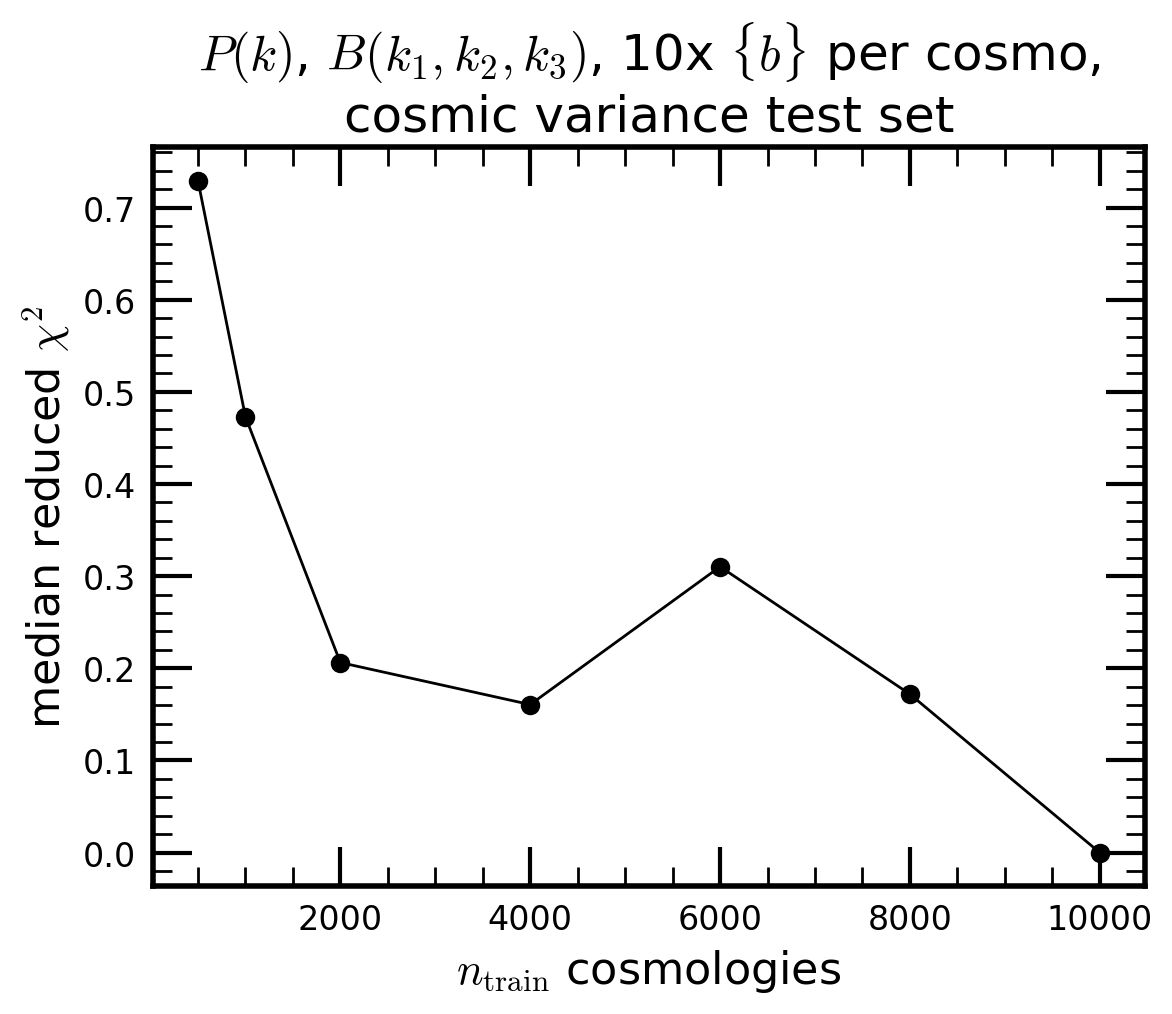

In [50]:
plt.title(f'{utils.get_stat_label(statistics)}, {utils.labels_biasparams[tag_biasparams]},\ncosmic variance test set', fontsize=18)
plt.plot(n_train_arr, chi2_arr/len(param_names_vary), marker='o', lw=1, color='k')
#plt.plot(n_train_arr, chi2_arr, marker='o', lw=1, color='k')

plt.xlabel(r'$n_\text{train}$ cosmologies', fontsize=16)
plt.ylabel('median reduced $\chi^2$', fontsize=16)

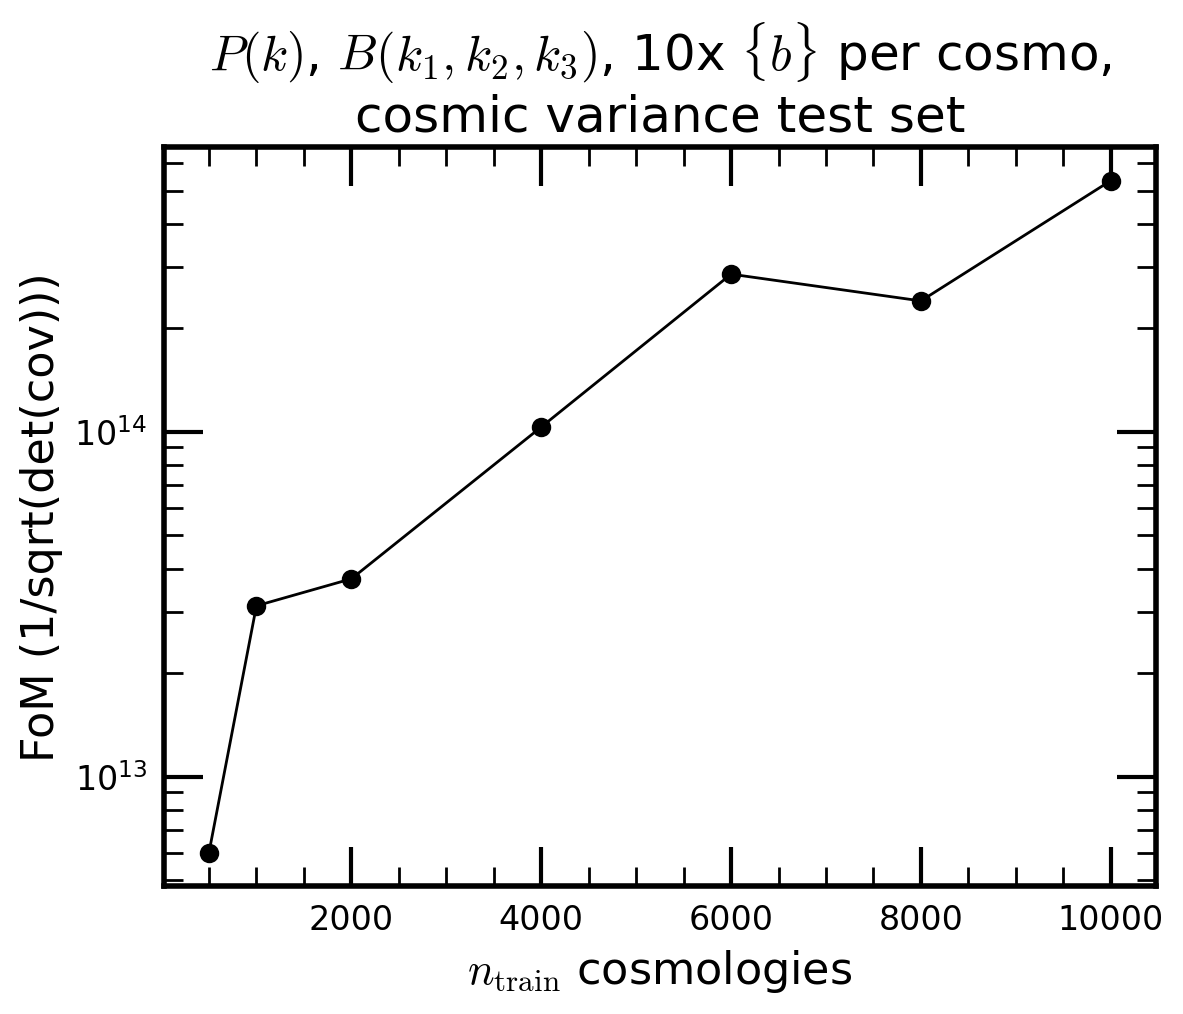

In [51]:
plt.title(f'{utils.get_stat_label(statistics)}, {utils.labels_biasparams[tag_biasparams]},\ncosmic variance test set', fontsize=18)
plt.plot(n_train_arr, fom_arr, marker='o', lw=1, color='k')
plt.xlabel(r'$n_\text{train}$ cosmologies', fontsize=16)
plt.ylabel('FoM (1/sqrt(det(cov)))', fontsize=16)
plt.yscale('log')

## Coverage test set

In [52]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tag_biasparams_test = '_biaszen_p4_n1000'
tag_datagen_test = ''               

tag_data_test = '_'+data_mode + tag_stats + tag_params_test + tag_biasparams_test + tag_datagen_test
tags_data_test = [tag_data_test]*len(tags_inf)

In [53]:
tags_test = tags_data_test

for i, tag_inf in enumerate(tags_inf):
    dir_sbi = f'../results/results_sbi/sbi{tag_inf}'
    tag_test = tags_test[i]
    fn_samples_test_pred = f'{dir_sbi}/samples_test{tag_test}_pred.npy'
    if not Path.exists(Path(fn_samples_test_pred)):
        print(f"Couldn't find fn_samples {fn_samples_test_pred}!")
        print(f"Removing from tags_inf, n_train_arr, tags_test")
        tags_inf.pop(i)
        n_train_arr.pop(i)
        tags_test.pop(i)
print(f"n_train_arr: {n_train_arr}")
    

Couldn't find fn_samples ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain500/samples_test_muchisimocks_pk_bispec_test_p5_n1000_biaszen_p4_n1000_pred.npy!
Removing from tags_inf, n_train_arr, tags_test
Couldn't find fn_samples ../results/results_sbi/sbi_muchisimocks_pk_bispec_p5_n10000_biaszen_p4_n100000_ntrain4000/samples_test_muchisimocks_pk_bispec_test_p5_n1000_biaszen_p4_n1000_pred.npy!
Removing from tags_inf, n_train_arr, tags_test
n_train_arr: [1000, 2000, 6000, 8000, 10000]


In [54]:
#param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
param_names_show = utils.param_names_all_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
covs_pred_arr = [] #note that this will be for all params, not just show, for now
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tag_biasparams_test)
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
covs_pred_arr = np.array(covs_pred_arr)

In [55]:
chi2_arr_coverage = []
fom_arr_coverage = []
for i, tag_inf in enumerate(tags_inf):
    chi2_arr_coverage.append(utils.chi2(theta_true_arr[i], theta_pred_arr[i], covs_pred_arr[i]))
    fom_arr_coverage.append(utils.figure_of_merit(covs_pred_arr[i]))
chi2_arr_coverage = np.array(chi2_arr_coverage)
fom_arr_coverage = np.array(fom_arr_coverage)

Text(0, 0.5, 'median reduced $\\chi^2$')

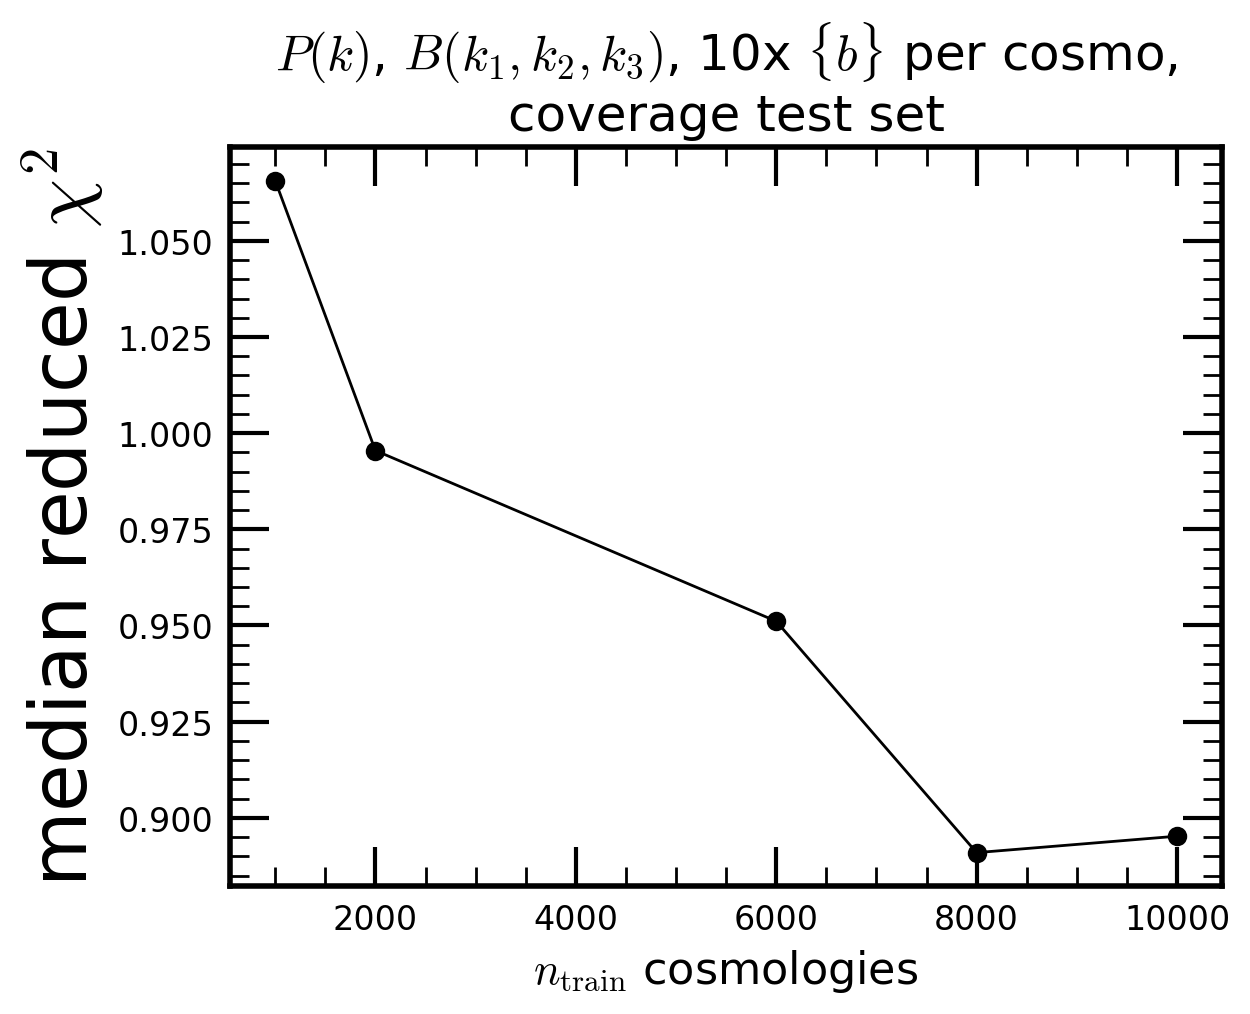

In [56]:
plt.title(f'{utils.get_stat_label(statistics)}, {utils.labels_biasparams[tag_biasparams]},\ncoverage test set', fontsize=18)
plt.plot(n_train_arr, np.median(chi2_arr_coverage, axis=1)/len(param_names_vary), marker='o', lw=1, color='k')
#plt.plot(n_train_arr, chi2_arr_coverage, marker='o', lw=1, color='k')

plt.xlabel(r'$n_\text{train}$ cosmologies', fontsize=16)
plt.ylabel('median reduced $\chi^2$')

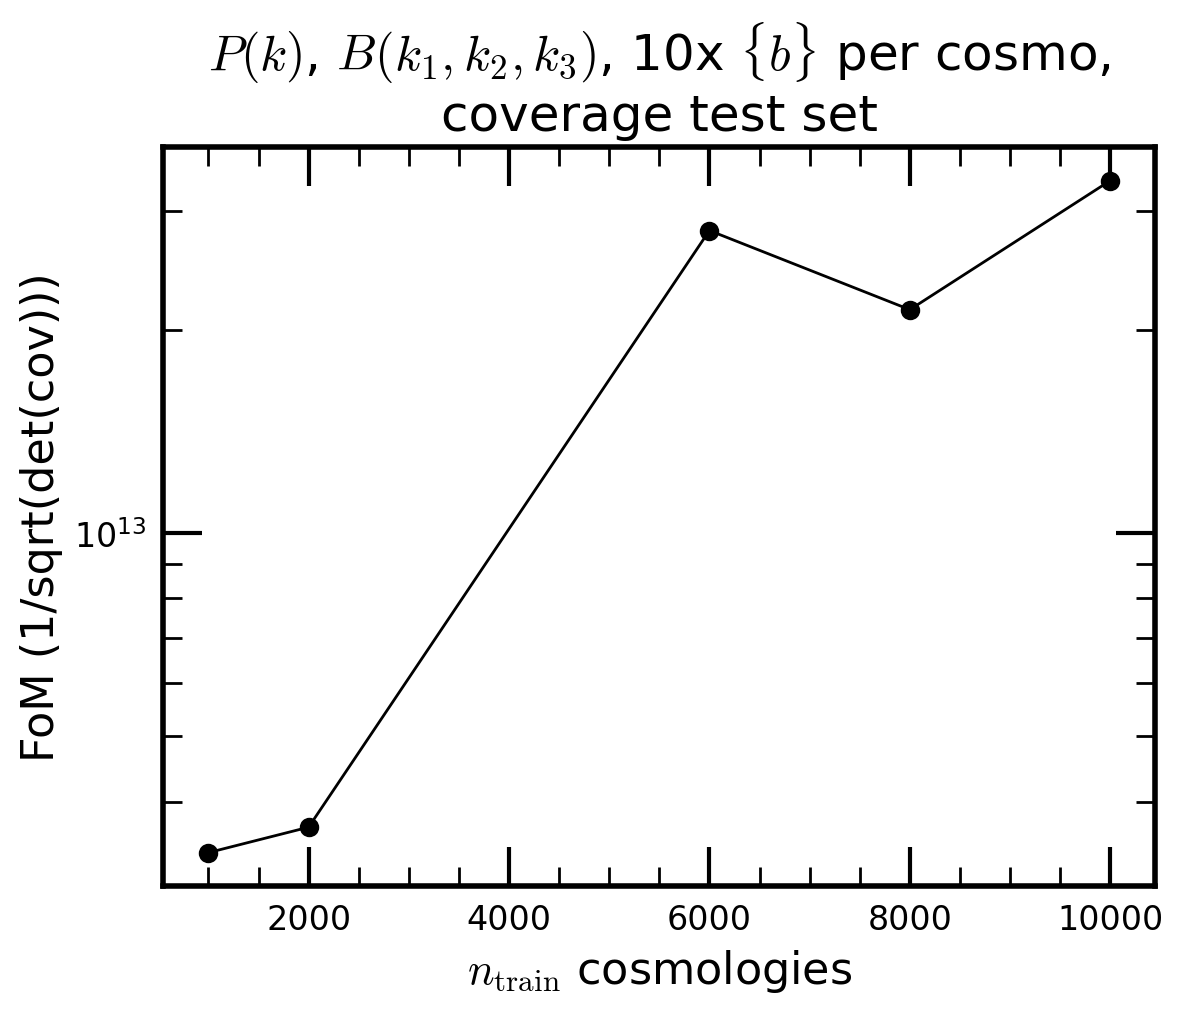

In [57]:
plt.title(f'{utils.get_stat_label(statistics)}, {utils.labels_biasparams[tag_biasparams]},\ncoverage test set', fontsize=18)

plt.plot(n_train_arr,  np.median(fom_arr_coverage, axis=1), marker='o', lw=1, color='k')
plt.xlabel(r'$n_\text{train}$ cosmologies', fontsize=16)
plt.ylabel('FoM (1/sqrt(det(cov)))', fontsize=16)
plt.yscale('log')